Yasaman Shahrasbi

COMP 5107 - Final Project

Student#: 101201935

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
from numpy import linalg as LA
import math

In [3]:
df_train_ = pd.read_csv('/content/drive/MyDrive/uOttawa/ForthSemester/Pattern Recognition/Project/KDDTrain+.txt', header=None)
df_test_ = pd.read_csv('/content/drive/MyDrive/uOttawa/ForthSemester/Pattern Recognition/Project/KDDTest+.txt', header=None)

# Preprocessing

In [4]:
df = pd.concat([df_train_, df_test_], axis = 0)

In [5]:
df = shuffle(df)

In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
df.drop(columns=[1, 2, 3, 42], inplace=True)

In [8]:
cols=["duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "Class"]

In [9]:
df.columns = cols

## Labels

In [10]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(df.Class.map(lambda x:1 if x=='normal' else 0))

In [11]:
y = bin_label

In [12]:
y = pd.DataFrame(y)

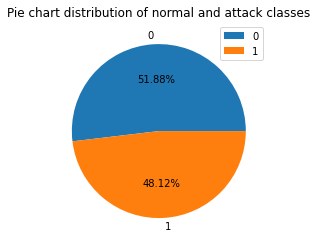

In [13]:
import matplotlib.pyplot as plt
# pie chart distribution of normal and attack labels 
#plt.figure(figsize=(8,8)) 
plt.pie(y.Class.value_counts(),labels=y.Class.unique(),autopct='%0.2f%%') 
plt.title("Pie chart distribution of normal and attack classes") 
plt.legend() 
#plt.savefig('plots/Pie_chart_binary.png') 
plt.show()

In [14]:
y.value_counts()

Class
1        77054
0        71463
dtype: int64

## Find the six most importance features using Feature Importance -- Extra tree classifier




In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
model = ExtraTreesClassifier(n_estimators=6)

In [17]:
model.fit(df.drop(columns=["Class"]), y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(n_estimators=6)

In [18]:
print(model.feature_importances_)

[1.16471082e-02 2.31405128e-02 2.07286611e-02 4.75767052e-05
 1.03076428e-02 1.03810506e-04 1.12291751e-02 4.73811753e-03
 6.81660803e-02 4.86805358e-03 3.52391559e-04 6.31719200e-05
 4.37685674e-04 3.02082176e-04 1.75700804e-04 2.92537027e-04
 0.00000000e+00 1.80944286e-04 6.99841816e-03 4.82382550e-02
 1.72049681e-02 8.11846822e-02 6.12210317e-02 1.07199138e-02
 1.28340532e-02 5.00171220e-02 9.28313436e-02 1.05286794e-02
 2.08195892e-02 9.96333008e-02 1.02195708e-01 1.78322921e-02
 6.72374791e-02 1.22716583e-02 9.51966029e-03 2.84259840e-02
 4.01997184e-02 5.33048903e-02]


In [19]:
importances = model.feature_importances_
importances

array([1.16471082e-02, 2.31405128e-02, 2.07286611e-02, 4.75767052e-05,
       1.03076428e-02, 1.03810506e-04, 1.12291751e-02, 4.73811753e-03,
       6.81660803e-02, 4.86805358e-03, 3.52391559e-04, 6.31719200e-05,
       4.37685674e-04, 3.02082176e-04, 1.75700804e-04, 2.92537027e-04,
       0.00000000e+00, 1.80944286e-04, 6.99841816e-03, 4.82382550e-02,
       1.72049681e-02, 8.11846822e-02, 6.12210317e-02, 1.07199138e-02,
       1.28340532e-02, 5.00171220e-02, 9.28313436e-02, 1.05286794e-02,
       2.08195892e-02, 9.96333008e-02, 1.02195708e-01, 1.78322921e-02,
       6.72374791e-02, 1.22716583e-02, 9.51966029e-03, 2.84259840e-02,
       4.01997184e-02, 5.33048903e-02])

In [20]:
indices = np.argsort(importances)[-6:]
indices

array([32,  8, 21, 26, 29, 30])

In [21]:
X_ = df.iloc[:,indices]
X_

,dst_host_same_src_port_rate,logged_in,serror_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate
0,0.00,0,0.00,0.06,7,0.03
1,0.01,1,0.00,0.00,194,1.00
2,0.00,0,0.15,1.00,1,0.00
3,0.00,0,1.00,0.06,20,0.08
4,0.01,1,0.00,0.00,255,1.00
...,...,...,...,...,...,...
148512,0.31,0,0.00,0.00,17,0.31
148513,0.01,1,0.00,0.00,255,1.00
148514,0.01,1,0.00,0.00,14,0.09
148515,0.00,0,1.00,0.06,2,0.01


## min max -- normalize between (-2, 2)

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-2,2))

In [23]:
X = pd.DataFrame(min_max_scaler.fit_transform(X_))

In [24]:
normalized_cols=["dst_host_count", "srv_count",	"dst_host_srv_count",	"dst_bytes",	"src_bytes",	"count"]

In [25]:
X.columns = normalized_cols

## Select six features from the dataset

In [26]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X = SelectKBest(chi2, k=6).fit_transform(df.drop(columns=["Class"]), y)
#X = SelectKBest(chi2, k=6).fit_transform(X_, y)
#X = pd.DataFrame(X)

In [27]:
X_0 = X[y["Class"] == 0].iloc[0:4000]
y_0 = y[y["Class"] == 0].iloc[0:4000]

X_0 = X_0.T.to_numpy()
y_0 = y_0.to_numpy()

In [28]:
X_0.shape

(6, 4000)

In [29]:
X_1 = X[y["Class"] == 1].iloc[0:4000]
y_1 = y[y["Class"] == 1].iloc[0:4000]

X_1 = X_1.T.to_numpy()
y_1 = y_1.to_numpy()

# Auxiliary Functions

In [30]:
# Function to plot the points

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

def plot(matrix_of_points1, matrix_of_points2, d1, d2, title):
  #figure(figsize=(7, 7), dpi=80)
  plt.scatter(matrix_of_points1[d1, :], matrix_of_points1[d2, :], color = 'pink', label = "Class1")
  plt.scatter(matrix_of_points2[d1, :], matrix_of_points2[d2, :], color = 'green', label = "Class2")

  plt.title("x"+str(d1)+"-x"+str(d2)+" "+title) 
  plt.xlabel("x-"+str(d1))
  plt.ylabel("x-"+str(d2))
  plt.legend(fontsize=14)
  plt.show()

In [31]:
def convert(data):
  dim = data.shape[0]
  num_of_points = data.shape[1]
  data_converted = []
  for i in range(num_of_points):
    d = []
    for j in range(dim):
      d.append(data[j][i])
    data_converted.append(d)
  data_converted = np.array(data_converted)
  return data_converted

In [32]:
# Diagonalizing function

def diagonalize (matrix_X1, matrix_X2, sigma1, mean1, sigma2, mean2):

  # Calculate eigen values and eigen vectors of sigma1 and sigma2
  eigen_value_sigma_1, eigen_vector_sigma1 = LA.eig(sigma1)
  eigen_value_sigma_2, eigen_vector_sigma2 = LA.eig(sigma2)

  # Step1: Diagonalizing the distribution of points in class 1 -> isothetic elipses
  # Y = H * X
  matrix_Y1 = np.dot(np.transpose(eigen_vector_sigma1), matrix_X1)
  matrix_Y2 = np.dot(np.transpose(eigen_vector_sigma1), matrix_X2)
  # sigma Y = H * sigma X * transpose(H)
  sigma_Y1 = np.dot(np.dot(np.transpose(eigen_vector_sigma1), sigma1), eigen_vector_sigma1)
  sigma_Y2 = np.dot(np.dot(np.transpose(eigen_vector_sigma1), sigma2), eigen_vector_sigma1)

  # Step2: Diagonalizing and whitening the distribution of points in class 1 -> concentric circles
  # Z = H * Y
  # Z = power(lambda, -1/2) * Y
  matrix_Z1 = np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), matrix_Y1)
  matrix_Z2 = np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), matrix_Y2)
  # sigma Z = H * sigma X * transpose(H)
  # sigma Z = power(lambda, -1/2) * sigma Y * power(lambda, -1/2)
  sigma_Z1 = np.dot(np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), sigma_Y1), np.diag(np.power(eigen_value_sigma_1, -1/2)))
  sigma_Z2 = np.dot(np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), sigma_Y2), np.diag(np.power(eigen_value_sigma_1, -1/2)))

  # Step3: Diagonalizing the distribution of points in class 2 -> isothetic elipses
  eigen_value_sigma_Z1, eigen_vector_sigma_Z1 = LA.eig(sigma_Z1)
  eigen_value_sigma_Z2, eigen_vector_sigma_Z2 = LA.eig(sigma_Z2)
  # A = H * Z
  matrix_A1 = np.dot(np.transpose(eigen_vector_sigma_Z2), matrix_Z1)
  matrix_A2 = np.dot(np.transpose(eigen_vector_sigma_Z2), matrix_Z2)
  # sigma A = H * sigma X * transpose(H)
  sigma_A1 = np.dot( np.dot(np.transpose(eigen_vector_sigma_Z2), sigma_Z1), eigen_vector_sigma_Z2 )
  sigma_A2 = np.dot( np.dot(np.transpose(eigen_vector_sigma_Z2), sigma_Z2), eigen_vector_sigma_Z2 )


  overall_multiplying_matrix = np.dot(np.dot(np.transpose(eigen_vector_sigma_Z2), np.diag(np.power(eigen_value_sigma_1, -1/2))), np.transpose(eigen_vector_sigma1))
  new_matrix_X1 = np.dot(overall_multiplying_matrix, matrix_X1)
  new_matirx_X2 = np.dot(overall_multiplying_matrix, matrix_X2)
  sigma_new_matrix_X1 = sigma_A1
  sigma_new_matrix_X2 = sigma_A2
  mean_new_matrix_X1 = np.dot(overall_multiplying_matrix, mean1)
  mean_new_matrix_X2 = np.dot(overall_multiplying_matrix, mean2)

  return new_matrix_X1, new_matirx_X2, sigma_new_matrix_X1, sigma_new_matrix_X2, mean_new_matrix_X1, mean_new_matrix_X2

# Plot data BEFORE diagonalization

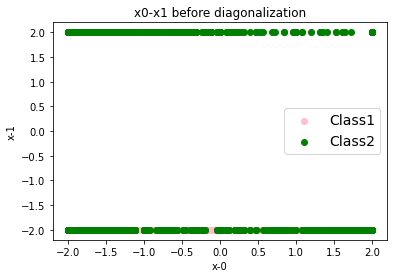

In [33]:
# plot against 0-1
plot(X_0, X_1, 0, 1, "before diagonalization")

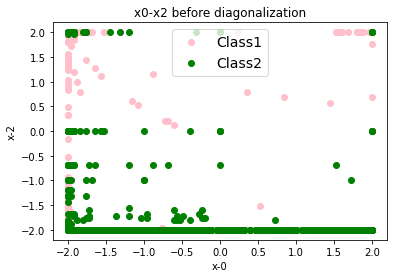

In [34]:
# plot against 0-2
plot(X_0, X_1, 0, 2, "before diagonalization")

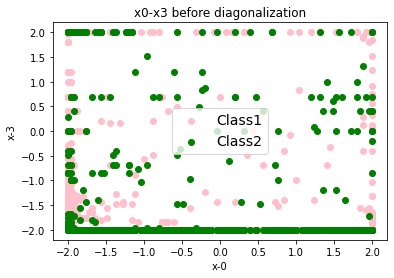

In [35]:
# plot against 0-3
plot(X_0, X_1, 0, 3, "before diagonalization")

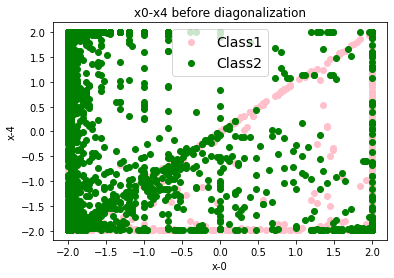

In [36]:
# plot against 0-4
plot(X_0, X_1, 0, 4, "before diagonalization")

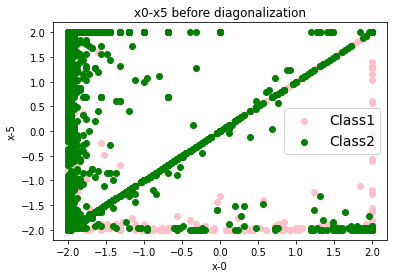

In [37]:
# plot against 0-5
plot(X_0, X_1, 0, 5, "before diagonalization")

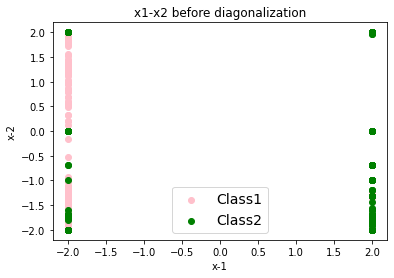

In [38]:
# plot against 1-2
plot(X_0, X_1, 1, 2, "before diagonalization")

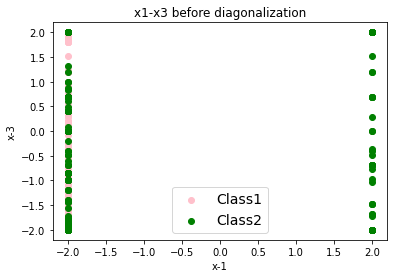

In [39]:
# plot against 1-3
plot(X_0, X_1, 1, 3, "before diagonalization")

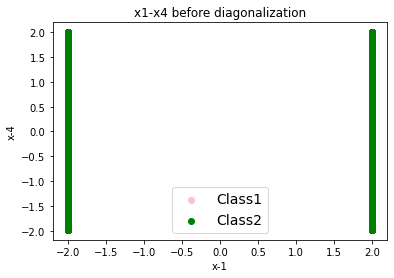

In [40]:
# plot against 1-4
plot(X_0, X_1, 1, 4, "before diagonalization")

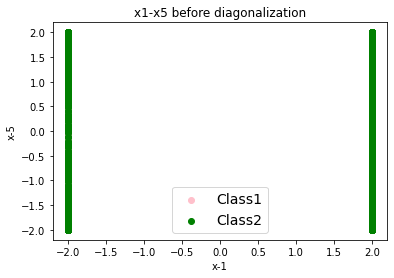

In [41]:
# plot against 1-5
plot(X_0, X_1, 1, 5, "before diagonalization")

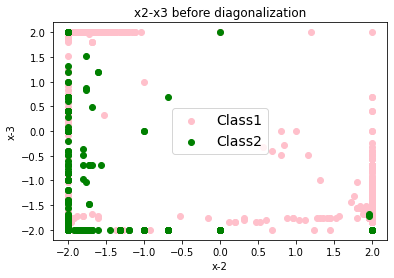

In [42]:
# plot against 2-3
plot(X_0, X_1, 2, 3, "before diagonalization")

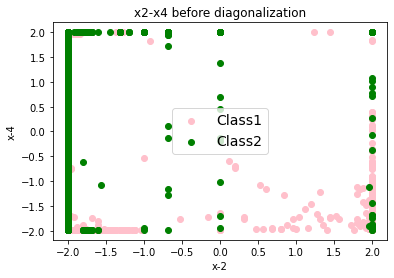

In [43]:
# plot against 2-4
plot(X_0, X_1, 2, 4, "before diagonalization")

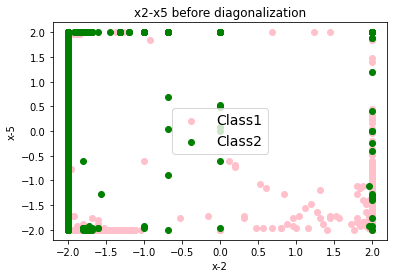

In [44]:
# plot against 2-5
plot(X_0, X_1, 2, 5, "before diagonalization")

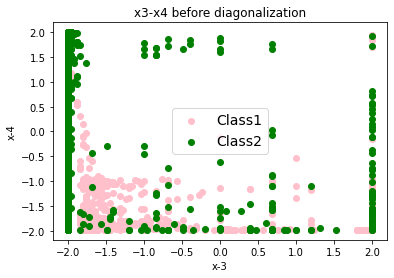

In [45]:
# plot against 3-4
plot(X_0, X_1, 3, 4, "before diagonalization")

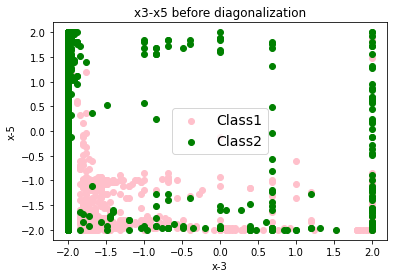

In [46]:
# plot against 3-5
plot(X_0, X_1, 3, 5, "before diagonalization")

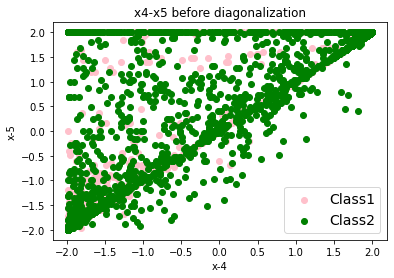

In [47]:
# plot against 4-5
plot(X_0, X_1, 4, 5, "before diagonalization")

# Classifiers

## 1. Bayes Discriminant Function

In [48]:
# Function to compute the optimal Bayes discriminant

def bayes_discriminant(sigma1, mean1, sigma2, mean2, p1 = 0.5, p2 = 0.5):
  C = (1/2 * np.log(np.linalg.det(sigma2)/np.linalg.det(sigma1))) + np.log(p1/p2) + 1/2 * (np.dot(np.dot(np.transpose(mean2), np.linalg.inv(sigma2)), mean2) -  np.dot(np.dot(np.transpose(mean1), np.linalg.inv(sigma1)), mean1))
  B = np.transpose(np.dot(np.transpose(mean1), np.linalg.inv(sigma1)) - np.dot(np.transpose(mean2), np.linalg.inv(sigma2)))
  A = 1/2 * (np.linalg.inv(sigma2) - np.linalg.inv(sigma1)) 
  return A, B, C

## 2. Nearest Neighbor Method

In [49]:
def knn (class1_test, class1_train, class2_test, class2_train, class1_test_y, class1_train_y,class2_test_y, class2_train_y):
  tp, fn, fp, tn = 0, 0, 0, 0

  for test_i in range(0, len(class1_test)):
    distance = math.inf
    label = -1
    for train_i in range(0, len(class1_train)):
      d1 = np.linalg.norm(class1_test[test_i] - class1_train[train_i])
      d2 = np.linalg.norm(class1_test[test_i] - class2_train[train_i])
      if d1 < distance and d1 < d2: 
        distance = d1
        label = class1_train_y[train_i]
      elif d2 < distance and d2 < d1:
        distance = d2
        label = class2_train_y[train_i]

    if (label == 0).any() and (class1_test_y[test_i] == 0).any():
      tp += 1
    elif (label == 1).any() and (class1_test_y[test_i] == 0).any():
      fp += 1


  for test_i in range(0, len(class2_test)):
    distance = math.inf
    label = -1
    for train_i in range(0, len(class1_train)):
      d1 = np.linalg.norm(class2_test[test_i] - class1_train[train_i])
      d2 = np.linalg.norm(class2_test[test_i] - class2_train[train_i])
      if d1 < distance and d1 < d2: 
        distance = d1
        label = class1_train_y[train_i]
      elif d2 < distance and d2 < d1:
        distance = d2
        label = class2_train_y[train_i]

    if (label == 0).any() and (class1_test_y[test_i] == 1).any():
      fn += 1
    elif (label == 1).any() and (class1_test_y[test_i] == 1).any():
      tn += 1
  return accuracy_calculation([tp, fn, tn, fp])

## 3. Linear Classifier -- Ho-Kashyap Rule

In [50]:
def ho_kashyap_preprocessing(A, B):
  X_0_ho_kashyap = np.c_[np.ones(A.shape[0]), A]
  X_1_ho_kashyap = -1*np.c_[np.ones(B.shape[0]), B]
  return np.vstack((X_0_ho_kashyap, X_1_ho_kashyap))

In [51]:
def ho_kashyap(class1_test, class1_train, class2_test, class2_train):
  X_train = ho_kashyap_preprocessing(class1_train, class2_train)
  X_test = ho_kashyap_preprocessing(class1_test, class2_test)
  a = np.ones(X_train.shape[1])
  b = np.ones(X_train.shape[0])
  learning_rate = 0.8
  k = 0
  while (k != 100):
    e = np.dot(X_train, a) - b
    b = b + learning_rate * (e + np.abs(e))
    a = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), np.transpose(X_train)), b)
    k += 1
  
  tp, tn , fp , fn = 0, 0, 0, 0
  results = np.dot(X_test, a) 
  for i in results[0:len(class1_test)]:
    if i > 0:
      tp += 1
    elif i < 0:
      fp += 1

  for i in results[len(class1_test):]:
    if i > 0:
      tn += 1
    elif i < 0:
      fn += 1

  return accuracy_calculation([tp, fn, tn, fp])

# Find Mean and Covariance


## Maximum Likelihood

### Mean

In [52]:
def maximum_likelihood_mean(data):
  num_of_points = data.shape[0]
  s = np.sum(data, axis = 0)
  mean = s/num_of_points
  return mean

Class0

In [53]:
maximum_likelihood_mean(convert(X_0))

array([-1.35427   , -1.734     ,  0.07501   , -1.55403   , -1.38660392,
       -1.12497   ])

Class1

In [54]:
maximum_likelihood_mean(convert(X_1))

array([-1.50038   ,  0.901     , -1.94252   , -1.88798   ,  1.01702353,
        1.27102   ])

### Covariance

In [55]:
def maximum_likelihood_covariance(data):
  num_of_points = data.shape[0]
  A1 = data - maximum_likelihood_mean(data)
  variance = np.dot(A1.T, A1)/num_of_points
  return variance

Class0

In [56]:
maximum_likelihood_covariance(convert(X_0))

array([[ 1.92795477, -0.03300418, -1.22035821, -0.09550501,  0.49581904,
         1.15572328],
       [-0.03300418,  0.993244  , -0.54719266, -0.06594802,  0.42471115,
         0.59876202],
       [-1.22035821, -0.54719266,  3.9094027 , -0.27518101, -0.73398762,
        -1.2149792 ],
       [-0.09550501, -0.06594802, -0.27518101,  0.84263996, -0.18391876,
        -0.29596953],
       [ 0.49581904,  0.42471115, -0.73398762, -0.18391876,  1.08924929,
         1.15462521],
       [ 1.15572328,  0.59876202, -1.2149792 , -0.29596953,  1.15462521,
         1.9164197 ]])

Class1

In [57]:
maximum_likelihood_covariance(convert(X_1))

array([[ 1.05912226e+00, -5.38197620e-01,  1.06990424e-02,
         7.85553676e-02, -5.20240590e-01, -3.15302212e-01],
       [-5.38197620e-01,  3.18819900e+00, -1.44694800e-02,
        -1.59650020e-01,  7.18328467e-01,  5.89450980e-01],
       [ 1.06990424e-02, -1.44694800e-02,  1.54488050e-01,
         2.74290400e-04, -2.12294929e-02, -1.82306296e-02],
       [ 7.85553676e-02, -1.59650020e-01,  2.74290400e-04,
         3.39539520e-01, -2.33761172e-01, -2.22492060e-01],
       [-5.20240590e-01,  7.18328467e-01, -2.12294929e-02,
        -2.33761172e-01,  2.11316567e+00,  1.59867405e+00],
       [-3.15302212e-01,  5.89450980e-01, -1.82306296e-02,
        -2.22492060e-01,  1.59867405e+00,  1.65952256e+00]])

## Bayesian

In [58]:
covariance_0 = np.identity(6)
mean_0 = np.array([1, 1, 1, 0, 1, 1])

### Mean

In [59]:
def Bayesian_mean_estimation(data, covariance, covariance_0, mean_0):
  n = data.shape[0]
  A1 = np.transpose(covariance/n + covariance_0)
  A2 = (1/n) * np.dot(np.dot(covariance, A1), mean_0)
  A3 = np.dot(np.dot(covariance_0, A1), np.sum(data, axis = 0)/n)
  mean = A2 + A3
  return mean

Class0

In [60]:
Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0)

array([-1.35480899, -1.73436025,  0.07648442, -1.55438391, -1.38699239,
       -1.12556441])

Class1

In [61]:
Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)

array([-1.50124957,  0.90335927, -1.94258581, -1.88847038,  1.01951962,
        1.27319814])

## Parzen Window

In [251]:
import math
def Gaussian_kernel(x, x_i):
  covariance = 0.5
  distribution = 1 / (math.sqrt(2 * math.pi) * covariance) * math.exp(-1 * np.power((x-x_i), 2) / (2 * np.power(covariance, 2)))
  return distribution

### Mean

In [252]:
def Parzen_mean_estimation(x, prob_x, volume):
  return x * prob_x * volume

### Covariance

In [253]:
def Parzen_covariance_estimation(x, prob_x, mean, volume):
  return np.power((x - mean), 2) * prob_x * volume

### Parzen per dimension

In [254]:
def parzen_per_dimension(points, volume):
  dimension = points.shape[0]
  parzen_mean_estimation = []
  parzen_covariance_estimation = []
  for dim in range(dimension):
    new_points = []
    probabilities = []
    #print("here", min(points[dim]), max(points[dim]))
    for pnt in np.arange(-5, 5, volume):
      new_points.append(pnt)
    
    # for each new point, calculate the contribution of the existing points:
    for x in new_points:
      prob = 0
      for x_i in points[dim]:
        prob += Gaussian_kernel(x, x_i)
      prob = prob / len(points[dim])
      probabilities.append(prob)
    
    parzen_mean = 0
    for i in range(len(new_points)):
      parzen_mean +=  Parzen_mean_estimation(new_points[i], probabilities[i], volume)
    parzen_mean_estimation.append(parzen_mean/len(new_points))

    parzen_covariance = 0
    for i in range(len(new_points)):
      parzen_covariance = parzen_covariance + Parzen_covariance_estimation(new_points[i], probabilities[i], parzen_mean, volume)
    parzen_covariance_estimation.append(parzen_covariance/len(new_points))

    # plot the final learned distribution of the features in each dimension
    print("plot for dimension", dim)
    plt.plot(new_points, probabilities, color = 'green', label="dimension"+str(dim))
    #plt.xlim([-1, 1])
    plt.show()
    
  return np.array(parzen_mean_estimation), np.diag(np.array(parzen_covariance_estimation))

Class0

plot for dimension 0


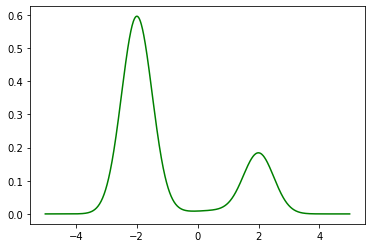

plot for dimension 1


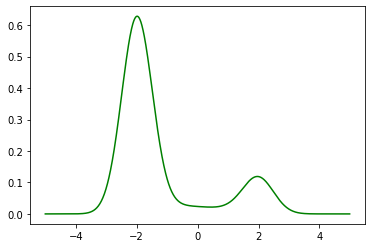

plot for dimension 2


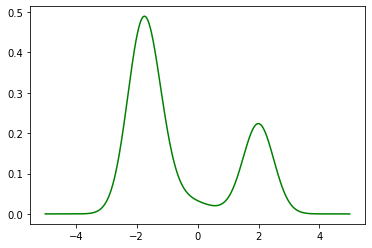

plot for dimension 3


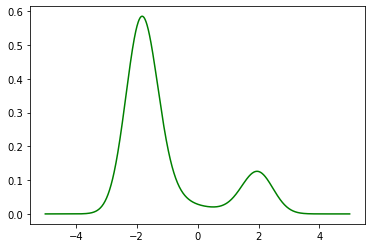

plot for dimension 4


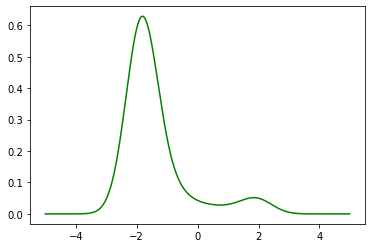

plot for dimension 5


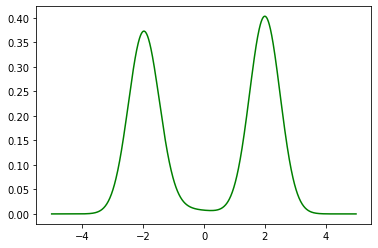

(array([-1.02794000e-03, -1.27896000e-03, -5.96960001e-04, -1.09716000e-03,
        -1.39633725e-03,  6.87599994e-05]),
 array([[0.00309946, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.00234969, 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00304358, 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.00224682, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00130536,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00411568]]))

In [255]:
Parzen_mean_0, Parzen_covariance_0 = parzen_per_dimension(X_0, 0.01)
Parzen_mean_0, Parzen_covariance_0

Class1

plot for dimension 0


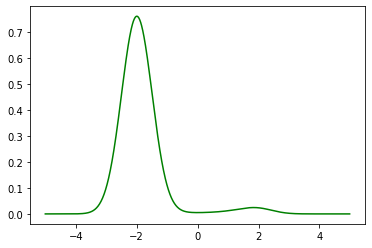

plot for dimension 1


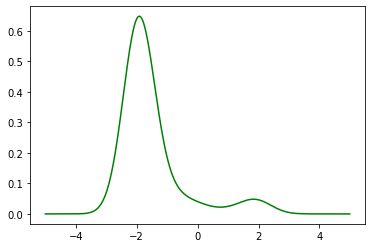

plot for dimension 2


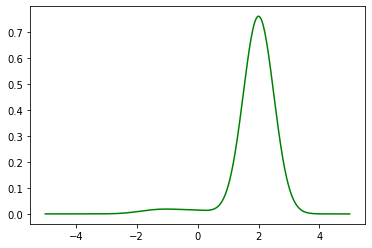

plot for dimension 3


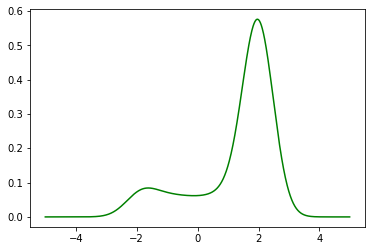

plot for dimension 4


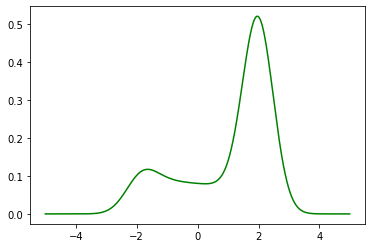

plot for dimension 5


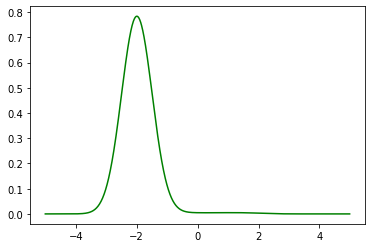

(array([-0.00184089, -0.00151986,  0.00187459,  0.00126597,  0.00103349,
        -0.00195541]),
 array([[0.00078141, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.0012778 , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00059844, 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.00189342, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00228097,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00036225]]))

In [256]:
Parzen_mean_1, Parzen_covariance_1 = parzen_per_dimension(X_1, 0.01)
Parzen_mean_1, Parzen_covariance_1

# Training and Testing

### auxiliary functions

In [62]:
# This function calculates tp, tn, fp, and fn for computing the accuracy

# If X_T * A * X + B_T * X + C > 0:
# X belongs to class w1
# Otherwise, X belongs to class w2

def confusion_matrix (class1_points, class2_points, sigma1, mean1, sigma2, mean2, p1, p2):
  tp, tn, fp, fn = 0, 0, 0, 0
  A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)
  # for class1:
  for pnt in class1_points:
    t = np.dot(np.dot(np.transpose(pnt), A), pnt) + np.dot(np.transpose(B), pnt) + C
    if t > 0:
      tp += 1
    if t < 0:
      fn += 1

  # for class2:
  for pnt in class2_points:
    v = np.dot(np.dot(np.transpose(pnt), A), pnt) + np.dot(np.transpose(B), pnt) + C
    if v < 0:
      tn += 1
    if v > 0:
      fp += 1
  return tp, fn, tn, fp

In [63]:
def convert(data):
  dim = data.shape[0]
  num_of_points = data.shape[1]
  data_converted = []
  for i in range(num_of_points):
    d = []
    for j in range(dim):
      d.append(data[j][i])
    data_converted.append(d)
  data_converted = np.array(data_converted)
  return data_converted

In [64]:
# function to seperate train and test data points for evaluation
def seperate (points, start, k):
  test = points[start:start+k]
  train = np.concatenate((points[0:start], points[start+k: len(points)]), axis = 0)
  return test, train

In [65]:
# given tp, fn, tn, fp, calculates the accuracy of two classes
def accuracy_calculation(metrics):
  tp, fn, tn, fp = metrics[0], metrics[1], metrics[2], metrics[3]
  try:
    accuracy_class1 = tp / (tp + fn)
    accuracy_class2 = tn / (tn + fp)
  except:
    accuracy_class1 = 0
    accuracy_class2 = 0
  return np.array([accuracy_class1, accuracy_class2])

### cross validation

In [66]:
def k_fold_cv(k, class1_points, class2_points, class1_y, class2_y, p1, p2):
  maximum_likelihood_accuracies = []
  Bayesian_accuracies = []
  knn_accuracies = []
  Ho_kashyap_accuracies = []
  
  for fold in range(0, class1_points.shape[1], k):
    #print("fold = ", fold)
    class1_test, class1_train = seperate(convert(class1_points), fold, k)
    class2_test, class2_train = seperate(convert(class2_points), fold, k)
    class1_test_y, class1_train_y = seperate(class1_y, fold, k)
    class2_test_y, class2_train_y = seperate(class2_y, fold, k)
    #print(class1_test.shape, class1_train.shape, class2_test.shape, class2_train.shape)

    # maximum likelihood
    class1_ml_mean, class1_ml_covariance = maximum_likelihood_mean(class1_train), maximum_likelihood_covariance(class1_train)
    class2_ml_mean, class2_ml_covariance = maximum_likelihood_mean(class2_train), maximum_likelihood_covariance(class2_train)
    maximum_likelihood_accuracies.append(accuracy_calculation(confusion_matrix(class1_test, class2_test, class1_ml_covariance, class1_ml_mean, class2_ml_covariance, class2_ml_mean, p1, p2)))

    # Bayesian
    class1_bl_mean, class1_bl_covariance = Bayesian_mean_estimation(class1_train, maximum_likelihood_covariance(class1_train), covariance_0, mean_0), maximum_likelihood_covariance(class1_train)
    class2_bl_mean, class2_bl_covariance = Bayesian_mean_estimation(class2_train, maximum_likelihood_covariance(class2_train), covariance_0, mean_0), maximum_likelihood_covariance(class2_train)
    Bayesian_accuracies.append(accuracy_calculation(confusion_matrix(class1_test, class2_test, class1_bl_covariance, class1_bl_mean, class2_bl_covariance, class2_bl_mean, p1, p2)))
   
    # KNN
    knn_accuracies.append(knn(class1_test, class1_train, class2_test, class2_train, class1_test_y, class1_train_y,class2_test_y, class2_train_y ))
    
    # Ho Kashyap
    Ho_kashyap_accuracies.append(ho_kashyap(class1_test, class1_train, class2_test, class2_train))

    mean_ml_accuracies = np.mean(maximum_likelihood_accuracies, axis=0)
    mean_bl_accuracies = np.mean(Bayesian_accuracies, axis=0)
    mean_knn_accuracies = np.mean(knn_accuracies, axis=0)
    mean_ho_kashyap_accuracies = np.mean(Ho_kashyap_accuracies, axis = 0)
    #mean_parzen_accuracies = np.mean(parzen_accuracies, axis=0)
  return mean_ml_accuracies, mean_bl_accuracies, mean_knn_accuracies, mean_ho_kashyap_accuracies

####Cross validation BEFORE diagonalization

In [67]:
k_fold_cv(5, X_0, X_1, y_0, y_1, 0.5, 0.5)

(array([0.8515 , 0.89825]),
 array([0.85175, 0.89825]),
 array([0.36, 0.  ]),
 array([0.9535    , 0.68217063]))

#### Cross validation AFTER diagonalization

Diagonalize

In [68]:
X_0_diagonalize, X_1_diagonalize, sigma_0_diagonalize, mean_0_diagonalize, sigma_1_diagonalize, mean_1_diagonalize = diagonalize(X_0, 
                                               X_1, 
                                               maximum_likelihood_covariance(convert(X_0)), 
                                               maximum_likelihood_mean(convert(X_0)), 
                                               maximum_likelihood_covariance(convert(X_1)), 
                                               maximum_likelihood_mean(convert(X_1))
                                               )

CV

In [69]:
k_fold_cv(5, X_0_diagonalize, X_1_diagonalize, y_0, y_1, 0.5, 0.5)

(array([0.8515 , 0.89825]),
 array([0.8515 , 0.89825]),
 array([0.365, 0.   ]),
 array([0.76708978, 0.90465923]))

# Plot data AFTER diagonalization

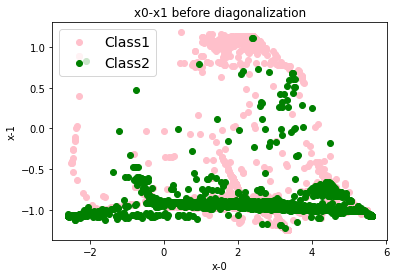

In [267]:
# plot against 0-1
plot(X_0_diagonalize, X_1_diagonalize, 0, 1, "before diagonalization")

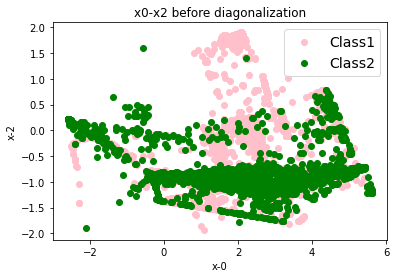

In [268]:
# plot against 0-2
plot(X_0_diagonalize, X_1_diagonalize, 0, 2, "before diagonalization")

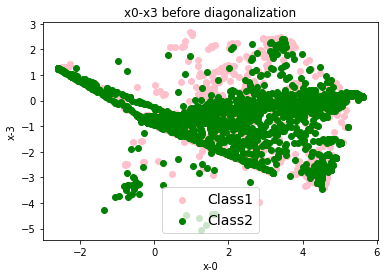

In [269]:
# plot against 0-3
plot(X_0_diagonalize, X_1_diagonalize, 0, 3, "before diagonalization")

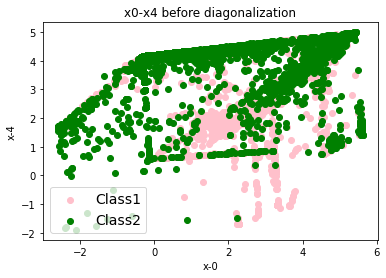

In [270]:
# plot against 0-4
plot(X_0_diagonalize, X_1_diagonalize, 0, 4, "before diagonalization")

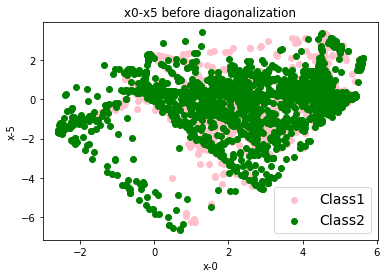

In [271]:
# plot against 0-5
plot(X_0_diagonalize, X_1_diagonalize, 0, 5, "before diagonalization")

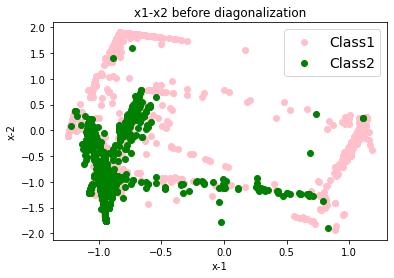

In [272]:
# plot against 1-2
plot(X_0_diagonalize, X_1_diagonalize, 1, 2, "before diagonalization")

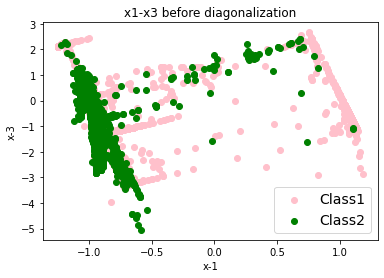

In [273]:
# plot against 1-3
plot(X_0_diagonalize, X_1_diagonalize, 1, 3, "before diagonalization")

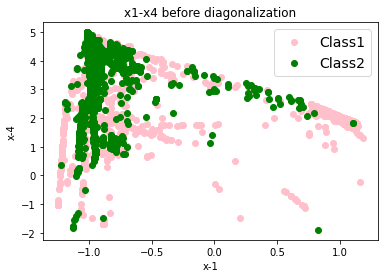

In [274]:
# plot against 1-4
plot(X_0_diagonalize, X_1_diagonalize, 1, 4, "before diagonalization")

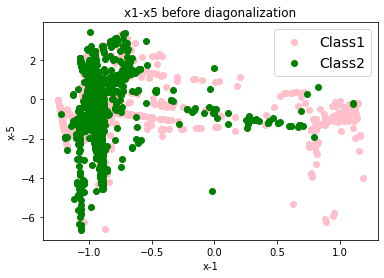

In [275]:
# plot against 1-5
plot(X_0_diagonalize, X_1_diagonalize, 1, 5, "before diagonalization")

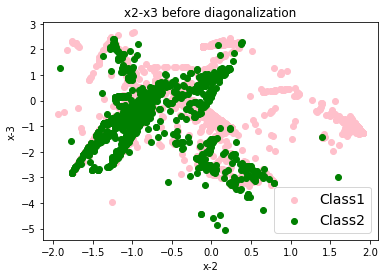

In [276]:
# plot against 2-3
plot(X_0_diagonalize, X_1_diagonalize, 2, 3, "before diagonalization")

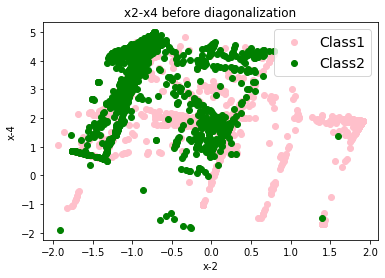

In [277]:
# plot against 2-4
plot(X_0_diagonalize, X_1_diagonalize, 2, 4, "before diagonalization")

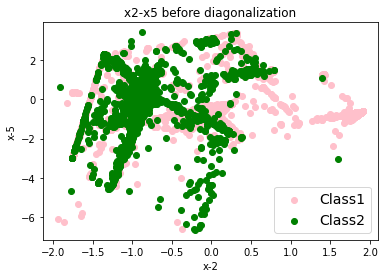

In [278]:
# plot against 2-5
plot(X_0_diagonalize, X_1_diagonalize, 2, 5, "before diagonalization")

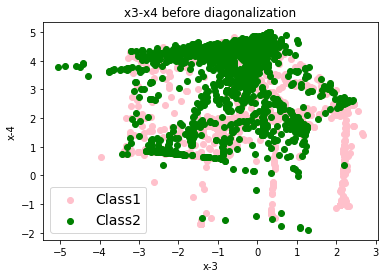

In [279]:
# plot against 3-4
plot(X_0_diagonalize, X_1_diagonalize, 3, 4, "before diagonalization")

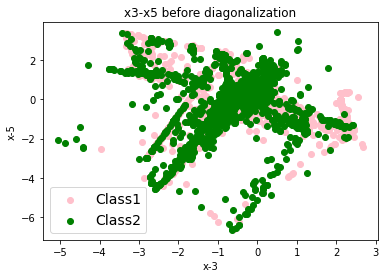

In [280]:
# plot against 3-5
plot(X_0_diagonalize, X_1_diagonalize, 3, 5, "before diagonalization")

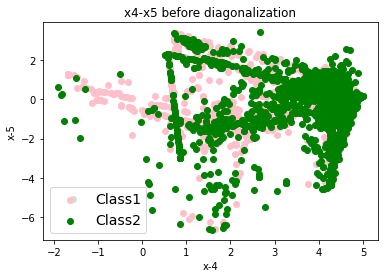

In [281]:
# plot against 4-5
plot(X_0_diagonalize, X_1_diagonalize, 4, 5, "before diagonalization")

# plot discriminant function

In [71]:
# Xi - Xj domain 
# consider Xi as a variable and Xj as a constant

def discriminant_function_plot(sigma1, mean1, sigma2, mean2, p1, p2, i, j):
  A, B, C = bayes_discriminant(sigma1, mean1, sigma2, mean2, p1, p2)
  xj_points = []
  roots1_xi = []
  roots2_xi = []
  for xj in np.arange(-5, 5, 0.1):
    xj_points.append(xj)
    m = A[i][i]
    n = np.dot((A[j][i] + A[i][j]), xj) + B[i]
    p = np.dot(A[j][j], np.power(xj, 2)) + np.dot(B[j], xj) + C
    root1_xi, root2_xi = np.roots(np.array([m, n, p]))
    roots1_xi.append(root1_xi)
    roots2_xi.append(root2_xi)
  return xj_points, roots1_xi, roots2_xi

In [72]:
def plot_discriminant_function(matrix_of_points1, matrix_of_points2, points, roots1, roots2, d1, d2, title):
  #figure(figsize=(7, 7), dpi=80)
  plt.scatter(matrix_of_points1[d1, :], matrix_of_points1[d2, :], color = 'pink', label = "Class1")
  plt.scatter(matrix_of_points2[d1, :], matrix_of_points2[d2, :], color = 'green', label = "Class2")

  plt.scatter(roots1, points, color = 'blue', label = "discriminant function")
  plt.scatter(roots2, points, color = 'purple', label = "discriminant function")

  plt.title("x"+str(d1)+"-x"+str(d2)+" "+title) 
  plt.xlabel("x-"+str(d1))
  plt.ylabel("x-"+str(d2))
  plt.legend(fontsize=14)
  plt.show()

# Plot Discriminant fucntion For Maximum Likelihood --Before diagonalization

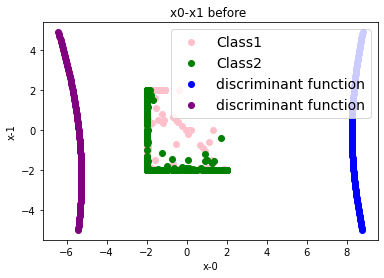

In [102]:
# along 0-1:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             0, 1)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 1, "before ")

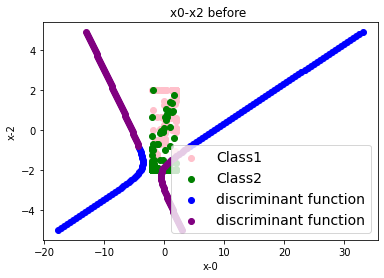

In [103]:
# along 0-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             0, 2)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 2, "before ")

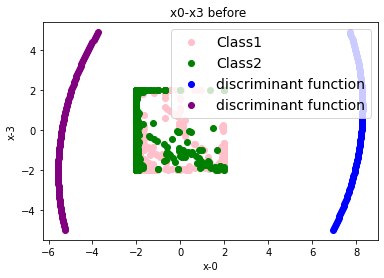

In [104]:
# along 0-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             0, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 3, "before ")

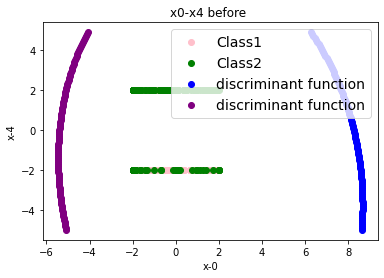

In [105]:
# along 0-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             0, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 4, "before ")

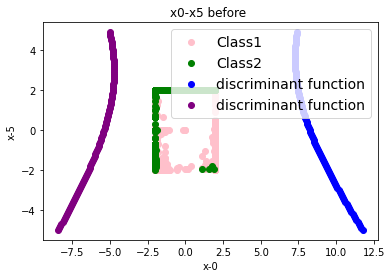

In [106]:
# along 0-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             0, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 5, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


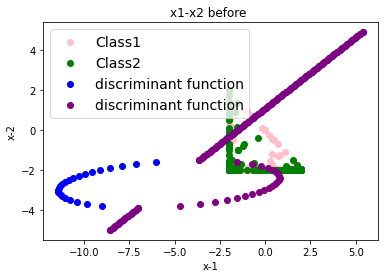

In [107]:
# along 1-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             1, 2)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 2, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


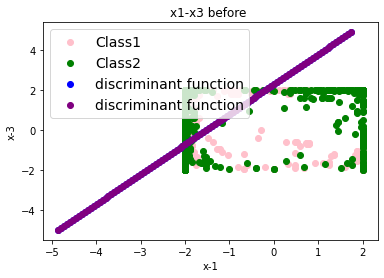

In [108]:
# along 1-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             1, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 3, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


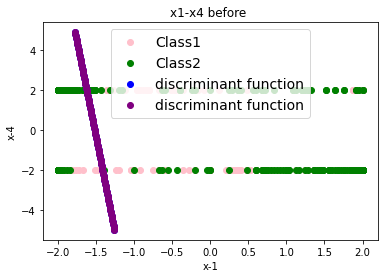

In [109]:
# along 1-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             1, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 4, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


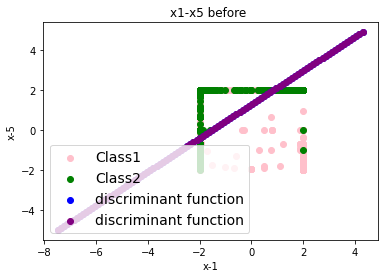

In [110]:
# along 1-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             1, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 5, "before ")

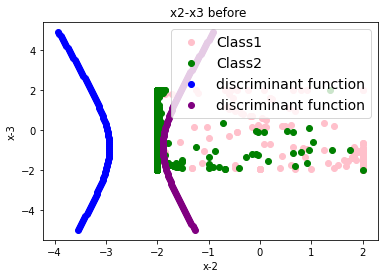

In [111]:
# along 2-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             2, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2, 3, "before ")

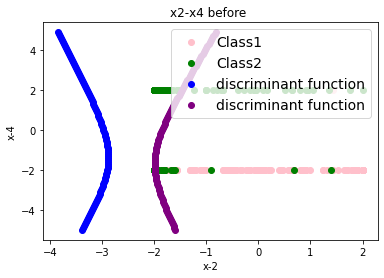

In [112]:
# along 2-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             2, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2,4, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


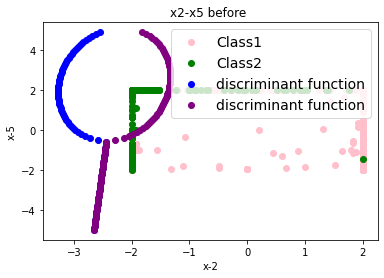

In [113]:
# along 2-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             2, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2, 5, "before ")

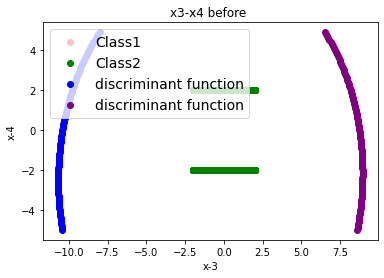

In [114]:
# along 3-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             3, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 3, 4, "before ")

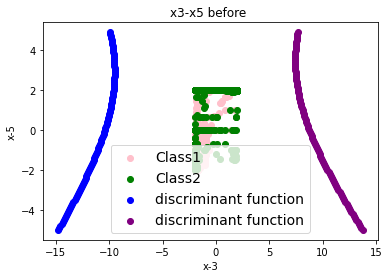

In [115]:
# along 3-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                             3, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 3, 5, "before ")

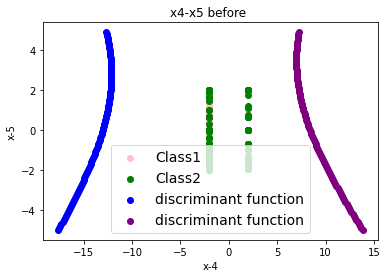

In [116]:
# along 4-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), maximum_likelihood_mean(convert(X_0)),
                                                             maximum_likelihood_covariance(convert(X_1)), maximum_likelihood_mean(convert(X_1))
                                                             , 0.5, 0.5, 
                                                              4, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 4, 5, "before ")

# Plot Discriminant function For Bayesian --Before diagonalization

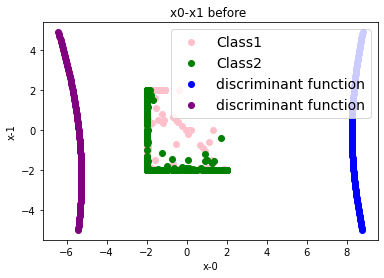

In [117]:
# along 0-1:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 1)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 1, "before ")

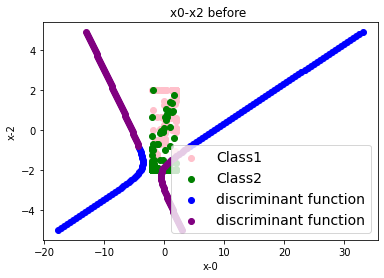

In [118]:
# along 0-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 2)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 2, "before ")

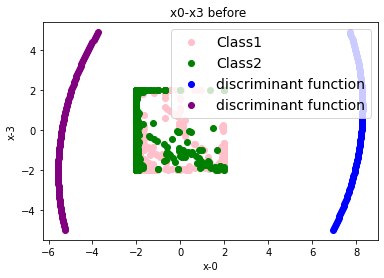

In [119]:
# along 0-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 3, "before ")

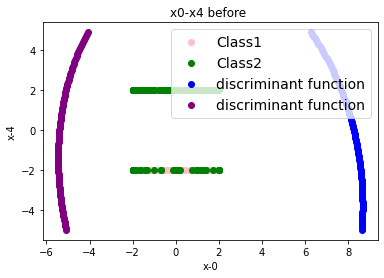

In [120]:
# along 0-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 4, "before ")

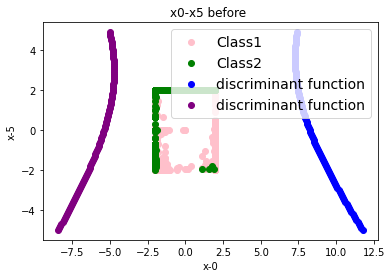

In [121]:
# along 0-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 5, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


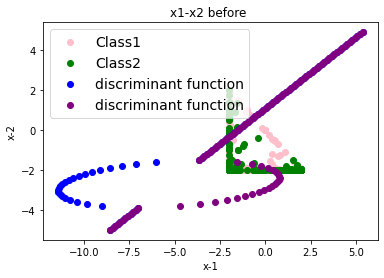

In [122]:
# along 1-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             1, 2)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 2, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


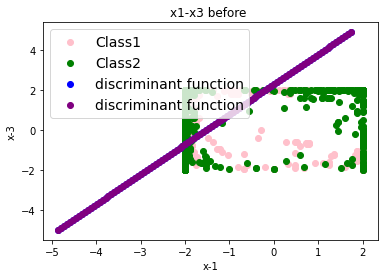

In [123]:
# along 1-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             1, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 3, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


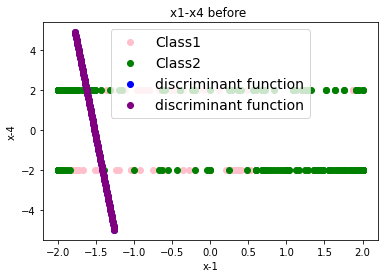

In [124]:
# along 1-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             1, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 4, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


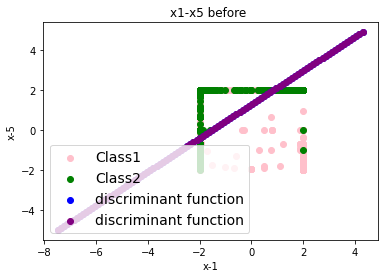

In [125]:
# along 1-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             1, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 5, "before ")

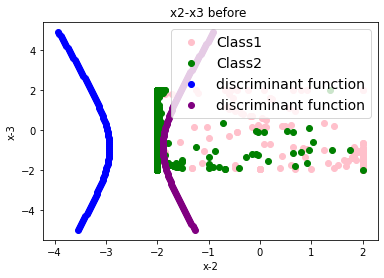

In [126]:
# along 2-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             2, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2, 3, "before ")

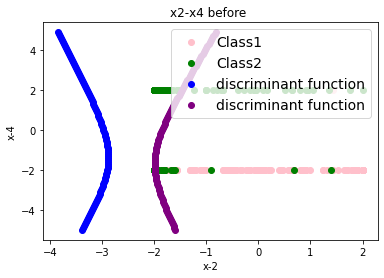

In [127]:
# along 2-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             2, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2,4, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


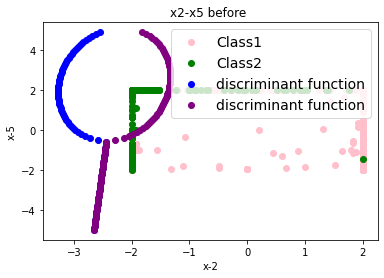

In [128]:
# along 2-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             2, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2, 5, "before ")

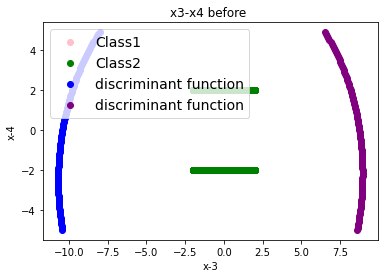

In [129]:
# along 3-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             3, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 3, 4, "before ")

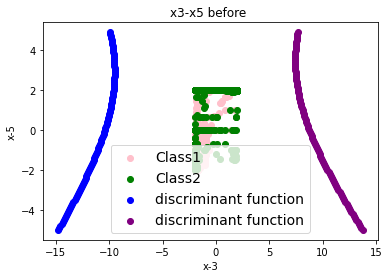

In [130]:
# along 3-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             3, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 3, 5, "before ")

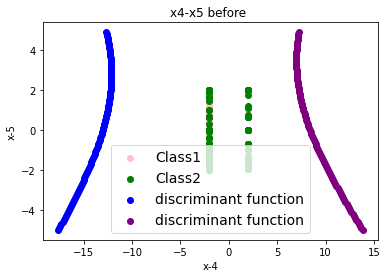

In [131]:
# along 4-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0)), Bayesian_mean_estimation(convert(X_0), maximum_likelihood_covariance(convert(X_0)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1)), Bayesian_mean_estimation(convert(X_1), maximum_likelihood_covariance(convert(X_1)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                              4, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 4, 5, "before ")

# Plot Discriminant fucntion For Maximum Likelihood --after diagonalization

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


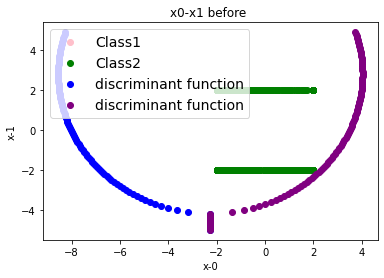

In [73]:
# along 0-1:
x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             0, 1)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 1, "before ")

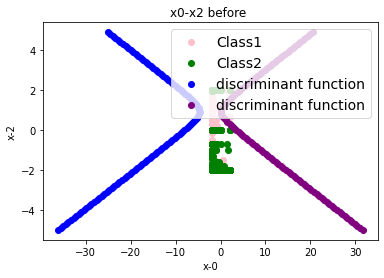

In [74]:
# along 0-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             0, 2)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 2, "before ")

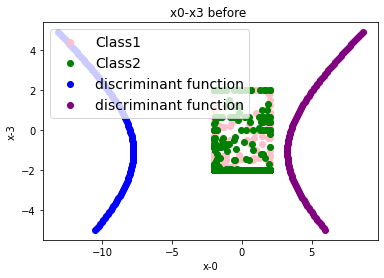

In [75]:
# along 0-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             0, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 3, "before ")

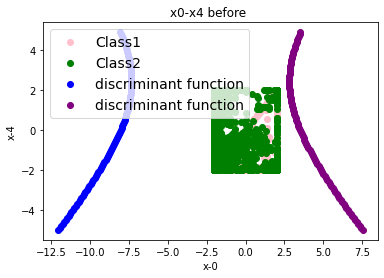

In [76]:
# along 0-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             0, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 4, "before ")

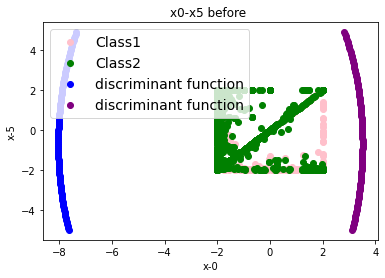

In [77]:
# along 0-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             0, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 5, "before ")

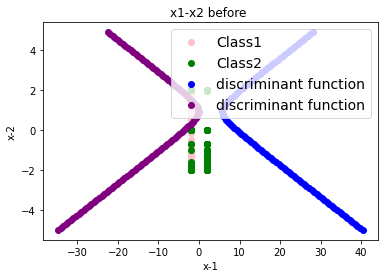

In [78]:
# along 1-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             1, 2)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 2, "before ")

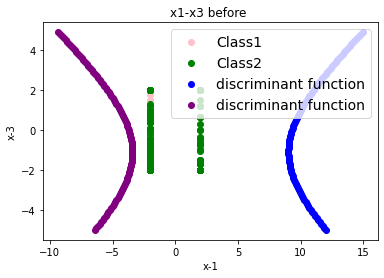

In [79]:
# along 1-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             1, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 3, "before ")

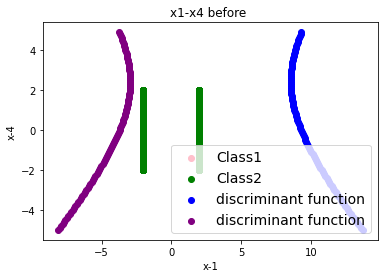

In [80]:
# along 1-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             1, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 4, "before ")

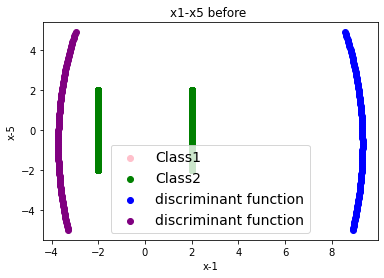

In [81]:
# along 1-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             1, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 5, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


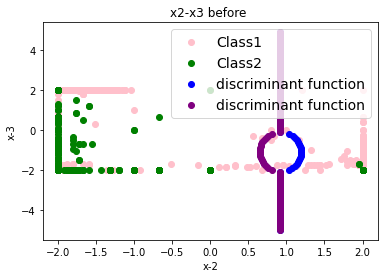

In [82]:
# along 2-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             2, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2, 3, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


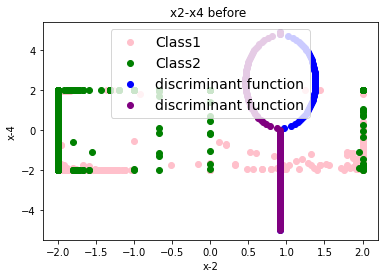

In [83]:
# along 2-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             2, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2,4, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


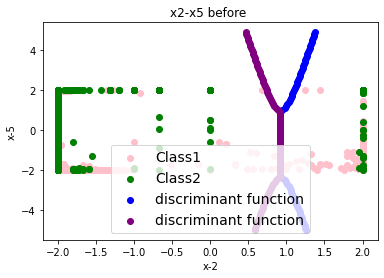

In [84]:
# along 2-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             2, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2, 5, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


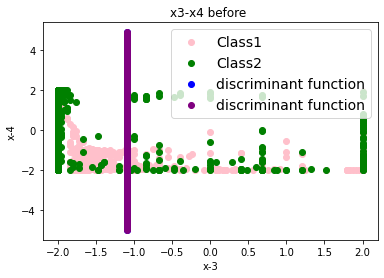

In [85]:
# along 3-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             3, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 3, 4, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


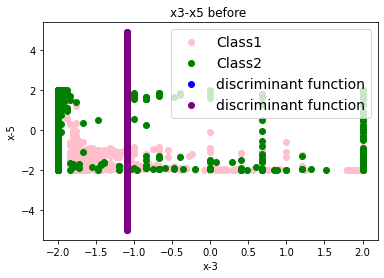

In [86]:
# along 3-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                             3, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 3, 5, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


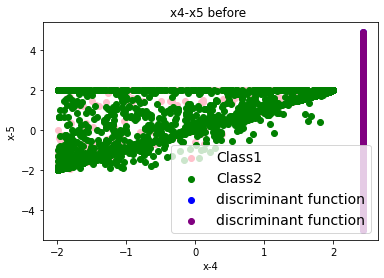

In [87]:
# along 4-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), maximum_likelihood_mean(convert(X_0_diagonalize)),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), maximum_likelihood_mean(convert(X_1_diagonalize))
                                                             , 0.5, 0.5, 
                                                              4, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 4, 5, "before ")

# Plot Discriminant function For Bayesian --after diagonalization

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


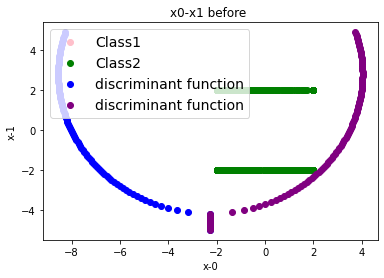

In [88]:
# along 0-1:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 1)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 1, "before ")

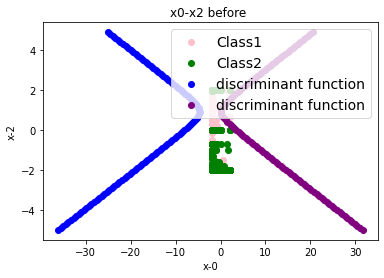

In [89]:
# along 0-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 2)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 2, "before ")

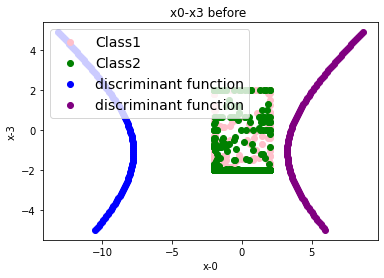

In [90]:
# along 0-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 3, "before ")

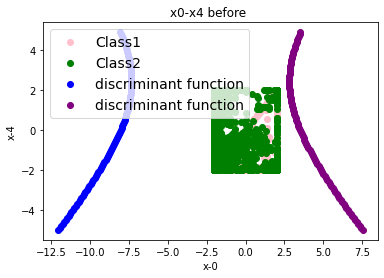

In [91]:
# along 0-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 4, "before ")

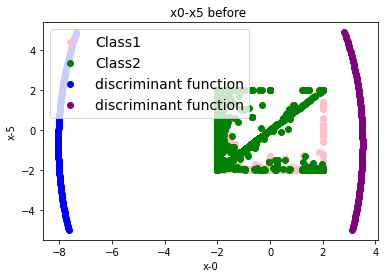

In [92]:
# along 0-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             0, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 0, 5, "before ")

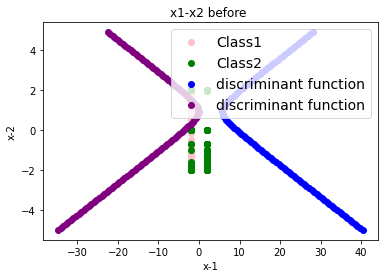

In [93]:
# along 1-2:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             1, 2)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 2, "before ")

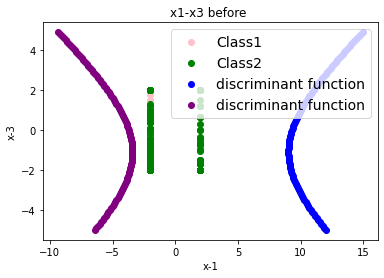

In [94]:
# along 1-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             1, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 3, "before ")

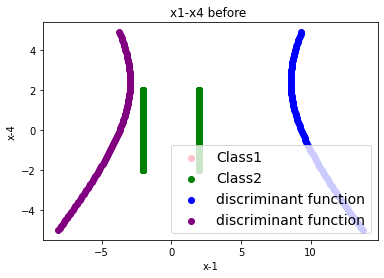

In [95]:
# along 1-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             1, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 4, "before ")

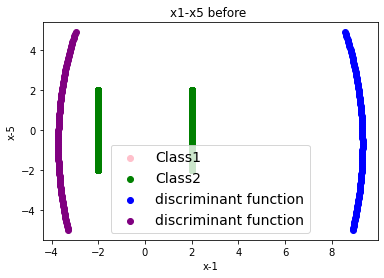

In [96]:
# along 1-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             1, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 1, 5, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


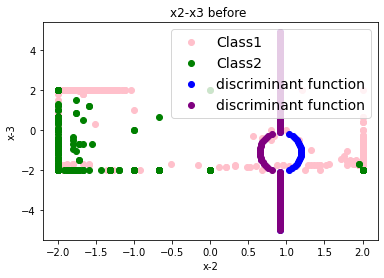

In [97]:
# along 2-3:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             2, 3)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2, 3, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


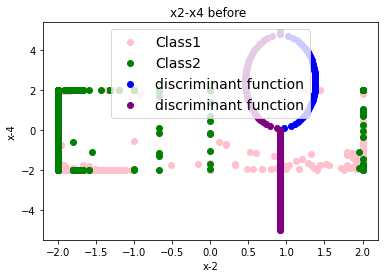

In [98]:
# along 2-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             2, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2,4, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


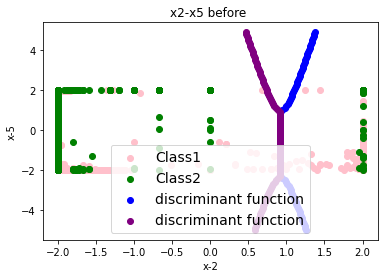

In [99]:
# along 2-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot( maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             2, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 2, 5, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


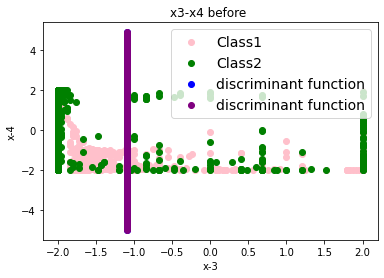

In [100]:
# along 3-4:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             3, 4)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 3, 4, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


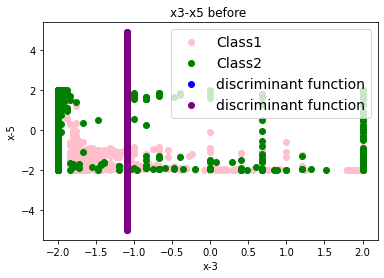

In [101]:
# along 3-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                             3, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 3, 5, "before ")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


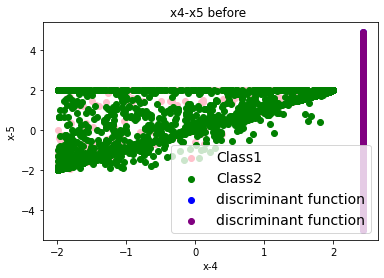

In [102]:
# along 4-5:

x1_points, roots1_x0, roots2_x0 = discriminant_function_plot(  maximum_likelihood_covariance(convert(X_0_diagonalize)), Bayesian_mean_estimation(convert(X_0_diagonalize), maximum_likelihood_covariance(convert(X_0_diagonalize)), covariance_0, mean_0),
                                                             maximum_likelihood_covariance(convert(X_1_diagonalize)), Bayesian_mean_estimation(convert(X_1_diagonalize), maximum_likelihood_covariance(convert(X_1_diagonalize)), covariance_0, mean_0)
                                                             , 0.5, 0.5, 
                                                              4, 5)
plot_discriminant_function(X_0, X_1, x1_points, roots1_x0, roots2_x0, 4, 5, "before ")